**EXAMEN 1**


**ANALISIS DE ROTACION DE CLIENTES EN TELECOMUNICACIONES**

In [66]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# Importamos librerias de analisis y visualizacion para desarrollo del trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
# Importamos la base de datos desde un CSV alojado en drive (se debe cambiar la ruta segun corresponda).
path = "/content/drive/MyDrive/Bases de datos ejercicios Pandas/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1 - LIMPIEZA DE DATOS**

Identificar y solucionar cualquier valor duplicado.

In [70]:
# Identificar filas duplicadas
duplicados = df.duplicated()
duplicados.sum()

np.int64(0)

In [71]:
# Eliminar Duplicados
df = df.drop_duplicates()


Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [72]:
# Visualizar las columnas en su totalidad para verificar la informacion
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
# Idenficar el tipo de dato las columnas, para evaluar si conhicide con la informacion
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [74]:
# Transformar y formatear datos de las columnas

# Para los valores que estan mal o erroneos, les asignamos el valor de Nan, para facilitar los pasos siguientes.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Para asegurar que los valores de la columna sean strings
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [80]:
# Convertir titulos de columnas a minúsculas y sin espacios
df.columns = df.columns.str.lower().str.strip()

In [75]:
# Convertir todos los valore a minúsculas y sin espacios
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.lower().str.strip()

Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [81]:
# identificar el total de datos nulos
df.isnull().sum()

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [83]:
# Rellenar valores faltantes en TotalCharges con el valor promedio
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].mean())

Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [78]:
# Revisar columnas en busca de valores inusuales
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


**2 - EXPLORACION DE DATOS CON PYTHON**

Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

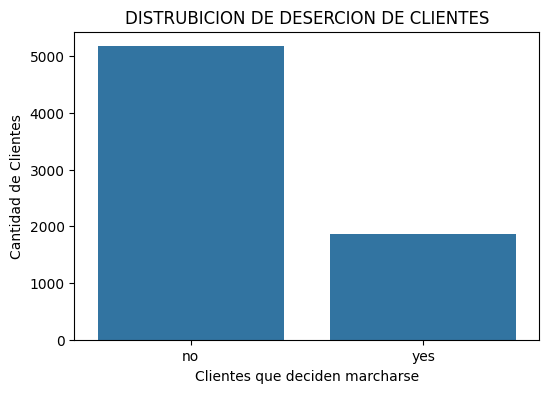

In [92]:
# Univariado 1: Distribución de "Churn"
# En el siguiente grafico visualizaremos la cantidad de clientes que deciden continuar con la compañia VS lo que prefieren retirarse
# Para este caso en particular podemos ver que al rededor del 20% de los clientes deciden retirarse de la compañia.
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title("DISTRUBICION DE DESERCION DE CLIENTES")
plt.xlabel("Clientes que deciden marcharse")
plt.ylabel("Cantidad de Clientes")
plt.show()

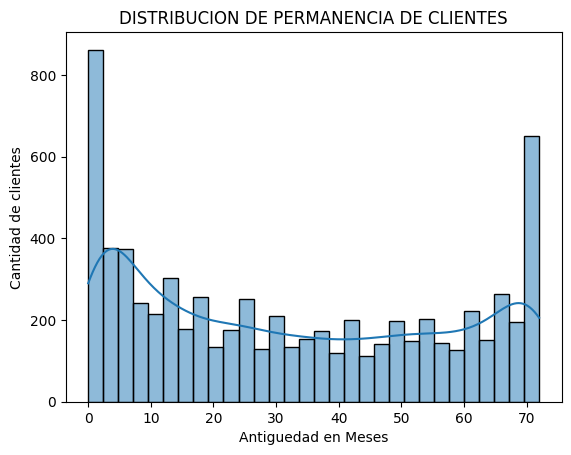

In [91]:
# 2. Distribución de "Tenure"
#En el siguiente grafico visualizaremos la cantidad de clientes que hay segun antiguedad con la compañia en meses. Es decir su comportamiento en relacion a su desercion.
# Para este caso podemos visualizar que nuestros primeros clientes tuvieron una gran permanencia, no obstante la expresion en el tiempo indica que tenemos una gran incorporacion de clientes pero una baja permanencia.
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title("DISTRIBUCION DE PERMANENCIA DE CLIENTES")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Antiguedad en Meses")
plt.show()

Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

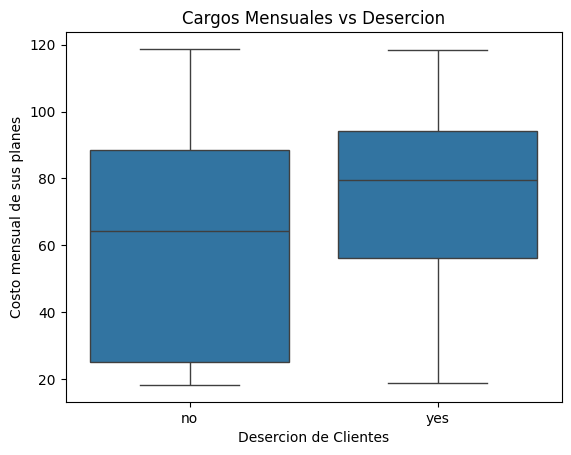

In [95]:
# "Cargos Mensuales" vs Estado de "Churn"
# El siguiente grafico de cajas muestra la comparacion entre el grupo de clientes que permanece y el que se va de la empresa, en relacion a los costos de sus planes.
# Para este caso, podemos apreciar que el grupo que deserta tiene asociados valores de planes mas altos que el que permanece.
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title("Cargos Mensuales vs Desercion")
plt.xlabel("Desercion de Clientes")
plt.ylabel("Costo mensual de sus planes")
plt.show()

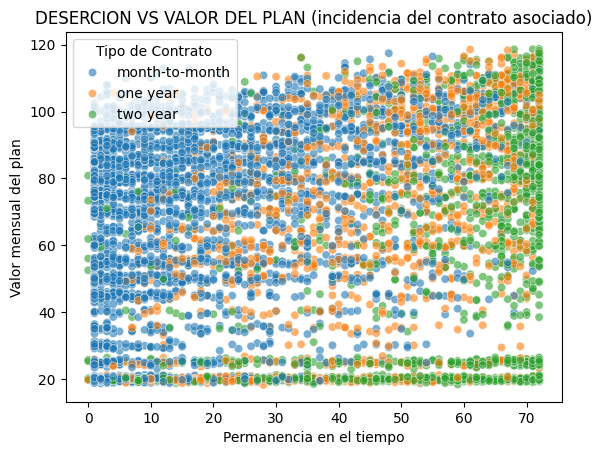

In [100]:
# Relación entre la desercion de los clientes vs su permanencia, basados en los valores de sus planes.
# Es importante considerar que existen 3 tipos de contratos para asignar valores mensuales.
# 1 - Contrato Mensual: Asociado a valores mas altos.
# 2 - contrato por 1 año: Asociado a valores mas bajos en su mensualidad.
# 3 - contrato por 2 años: Similar al de 1 año pero aun mas economico en el tiempo.
# Segun lo señalado y lo visualizado en el grafico podemos apreciar dos instancias: la primera, los altos valores de los planes estan asociados a mayor desercion en el tiempo, la segunda la combinacion de contrato mensual mas altos valores facilita la desercion de los clientes luego del primer mes, o final de cualquier mes.
sns.scatterplot(data=df, x='tenure', y='monthlycharges', hue='contract', alpha=0.6)
plt.title("DESERCION VS VALOR DEL PLAN (incidencia del contrato asociado)")
plt.xlabel("Permanencia en el tiempo")
plt.ylabel("Valor mensual del plan")
plt.legend(title='Tipo de Contrato')
plt.show()